<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/TB2/TB_2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TB 2

**Metode Algoritma k-NN**

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import statistics

df_new = pd.read_csv('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/dataset_breast_cancer_wisconsin_tb2.csv', header=None, dtype=None, skiprows=1)
# pd.DataFrame(data=df_new)
label = df_new[1].to_numpy()
data = df_new.iloc[:,2:len(df_new)-1].to_numpy()

kf = KFold(n_splits=10)
nilai_k = 4
clf = KNeighborsClassifier(n_neighbors=nilai_k)

print("Metode k-NN dengan nilai K = ", nilai_k)
print("")

dataTemp = list();
for train_index, test_index in kf.split(data):
  X_train, X_test = data[train_index], data[test_index]
  y_train, y_test = label[train_index], label[test_index]

  clf.fit(X_train, y_train)
  res = clf.score(X_test, y_test)
  dataTemp.append(res)

t1 = pd.DataFrame(data=dataTemp, columns=['Training Accuracy'])
print(t1)
print("")

# rata-rata
mean = list()
mean.append(statistics.mean(dataTemp))
t2 = pd.DataFrame(data=mean, columns=['Nilai Rata-rata'])
print(t2)
print("")

# Standar Deviasi
stdev = list()
stdev.append(statistics.stdev(dataTemp))
t3 = pd.DataFrame(data=stdev, columns=['Standar Deviasi'])
print(t3)

Metode k-NN dengan nilai K =  4

   Training Accuracy
0           0.771930
1           0.912281
2           0.929825
3           0.859649
4           0.964912
5           0.947368
6           0.947368
7           0.964912
8           0.912281
9           0.964286

   Nilai Rata-rata
0         0.917481

   Standar Deviasi
0         0.060748


**Metode Algoritma Decision Tree**

Metode Algoritma Decision Tree

Training data with GridSearch :  {'score': 0.8006218422075398, 'max_depth': {'max_depth': 3}}
Training data with GridSearch :  {'score': 0.9066491975106452, 'max_depth': {'max_depth': 5}}
Training data with GridSearch :  {'score': 0.8869047619047619, 'max_depth': {'max_depth': 24}}
Training data with GridSearch :  {'score': 0.9473035439137134, 'max_depth': {'max_depth': 5}}
Training data with GridSearch :  {'score': 0.9296296296296296, 'max_depth': {'max_depth': 3}}
Training data with GridSearch :  {'score': 0.9472222222222222, 'max_depth': {'max_depth': 20}}
Training data with GridSearch :  {'score': 0.89337822671156, 'max_depth': {'max_depth': 3}}
Training data with GridSearch :  {'score': 0.9526578073089702, 'max_depth': {'max_depth': 6}}
Training data with GridSearch :  {'score': 0.9526578073089702, 'max_depth': {'max_depth': 5}}
Training data with GridSearch :  {'score': 0.8998211091234347, 'max_depth': {'max_depth': 5}}
   Training Accuracy
0      

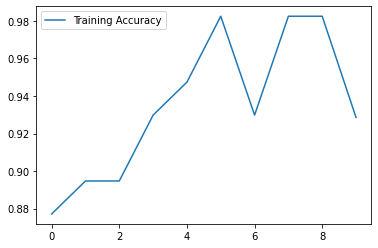

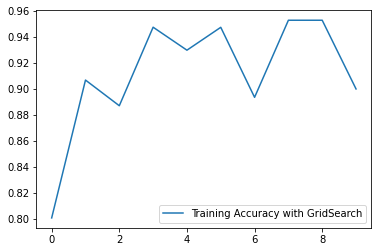

In [58]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import statistics
from sklearn.model_selection import GridSearchCV

df_new = pd.read_csv('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/dataset_breast_cancer_wisconsin_tb2.csv', header=None, dtype=None, skiprows=1)

label = df_new[1].to_numpy()
data = df_new.iloc[:,2:len(df_new)-1].to_numpy()

param_grid = {'max_depth': np.arange(1, 30)}

kf = KFold(n_splits=10)

clf = DecisionTreeClassifier(max_depth=4)

print("Metode Algoritma Decision Tree")
print("")

dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1_macro')

dataTemp = list();
dataTempBest = list();

for train_index, test_index in kf.split(data):
  X_train, X_test = data[train_index], data[test_index]
  y_train, y_test = label[train_index], label[test_index]

  clf.fit(X_train, y_train)
  res = clf.score(X_test, y_test)
  dataTemp.append(res)

  dt_clf.fit(X_train, y_train)
  res_best = dt_clf.score(X_test, y_test)
  print("Training data with GridSearch : ", {"score": res_best, 'max_depth': dt_clf.best_params_})
  dataTempBest.append(res_best)

t1 = pd.DataFrame(data=dataTemp, columns=['Training Accuracy'])
t1_2 = pd.DataFrame(data=dataTempBest, columns=['Training Accuracy with GridSearch'])
print(t1)
print(t1_2)
t1.plot()
t1_2.plot()
print("")

# rata-rata
mean = list()
mean_new = list();
mean.append(statistics.mean(dataTemp))
mean_new.append(statistics.mean(dataTempBest))
t2 = pd.DataFrame(data=mean, columns=['Nilai Rata-rata'])
t2_2 = pd.DataFrame(data=mean_new, columns=['Nilai Rata-rata with GridSearch'])
print(t2)
print(t2_2)
print("")

# Standar Deviasi
stdev = list()
stdev_new = list()
stdev.append(statistics.stdev(dataTemp))
stdev_new.append(statistics.stdev(dataTempBest))
t3 = pd.DataFrame(data=stdev, columns=['Standar Deviasi'])
t3_2 = pd.DataFrame(data=stdev_new, columns=['Standar Deviasi with GridSearch'])
print(t3)
print(t3_2)

**Metode Algoritma Perceptron**

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
import statistics

df_new = pd.read_csv('https://raw.githubusercontent.com/irwanmaulana42/google-collab/master/dataset_breast_cancer_wisconsin_tb2.csv', header=None, dtype=None, skiprows=1)

label = df_new[1].to_numpy()
data = df_new.iloc[:,2:len(df_new)-1].to_numpy()

kf = KFold(n_splits=10)

clf = Perceptron(tol=1e-3, random_state=0)

print("Metode Algoritma Perceptron")
print("")

dataTemp = list();
for train_index, test_index in kf.split(data):
  X_train, X_test = data[train_index], data[test_index]
  y_train, y_test = label[train_index], label[test_index]

  clf.fit(X_train, y_train)
  res = clf.score(X_test, y_test)
  dataTemp.append(res)

t1 = pd.DataFrame(data=dataTemp, columns=['Training Accuracy'])
print(t1)
print("")

# rata-rata
mean = list()
mean.append(statistics.mean(dataTemp))
t2 = pd.DataFrame(data=mean, columns=['Nilai Rata-rata'])
print(t2)
print("")

# Standar Deviasi
stdev = list()
stdev.append(statistics.stdev(dataTemp))
t3 = pd.DataFrame(data=stdev, columns=['Standar Deviasi'])
print(t3)

Metode Algoritma Perceptron

   Training Accuracy
0           0.701754
1           0.894737
2           0.929825
3           0.842105
4           0.877193
5           0.877193
6           0.912281
7           0.982456
8           0.859649
9           0.857143

   Nilai Rata-rata
0         0.873434

   Standar Deviasi
0         0.073005
